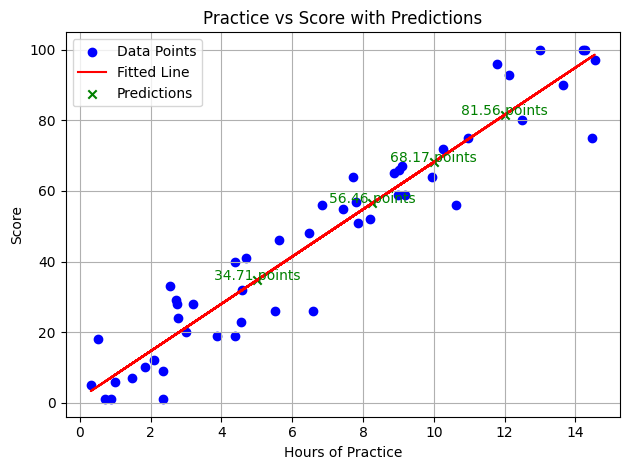

In [8]:
import sys
import os

# add utils folder to the path
# sys.path.append(os.path.abspath('../utils'))
# from create_data import create_dummy_study_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_dummy_study_data(name="dummy_data.csv", seed=42, num_samples=100, min_value=0.5, max_value=12):
    """
    Create a dummy dataset of study hours and corresponding percentiles.
    
    Parameters:
    - name: Name of the CSV file to save the data.
    - seed: Random seed for reproducibility.
    - num_samples: Number of samples to generate.
    - min_hours: Minimum study hours.
    - max_hours: Maximum study hours.
    
    Returns:
    - None
    """
    # Set a seed for reproducibility
    np.random.seed(seed)

    # Generate random study times between min_hours and max_hours
    field1 = np.round(np.random.uniform(min_value, max_value, num_samples), 2)

    # Generate percentiles based on a loose correlation to study time
    # Add some noise to make it more realistic
    noise = np.random.normal(0, 10, num_samples)
    field2 = np.clip((field1 * 7) + noise, 1, 100).astype(int)

    # Create the DataFrame
    df = pd.DataFrame({
        'Time Studied (hours)': field1,
        'Percentile Reached': field2
    })

    # Save to CSV
    df.to_csv("../data/" + name, index=False)

# Create dummy data
data = create_dummy_study_data("../data/test_study.csv", 42, 50, 0, 15)

data = np.loadtxt('../data/test_study.csv', delimiter=',', skiprows=1)

# Extract the data for plotting
practice = data[:,0]
score = data[:,1]

practice = np.array(practice)
score = np.array(score)

# fit a linear regression model
m, b = np.polyfit(practice, score, 1)

# make the predictions
pred_hours = np.array([5, 10, 12, 8.25])
predictions = m * pred_hours + b

# plot original data
plt.scatter(practice, score, label='Data Points', color='blue')
plt.plot(practice, m * practice + b, label='Fitted Line', color='red')

plt.scatter(pred_hours, predictions, label='Predictions', color='green', marker='x')

# optional annotation for the predictions
# optional: Annotate the predicted points
for practice, score in zip(pred_hours, predictions):
    plt.text(practice, score + 0.1, f'{score:.2f} points', ha='center', color='green')

# legend and labels
plt.legend()
plt.xlabel('Hours of Practice')
plt.ylabel('Score')
plt.title('Practice vs Score with Predictions')
plt.grid(True)
plt.tight_layout()
plt.show()
